# Moneyball

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessupdate
plt.style.use("seaborn")

In [82]:
mb_data = preprocessupdated.df3
mb_data.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
300,851,644,99,0.341,0.433,0.282,0.314,0.392,2002,ANA,207,736.0,743.0,77.0
301,819,674,98,0.346,0.423,0.267,0.305,0.397,2002,ARI,145,717.0,685.0,84.0
302,708,565,101,0.331,0.409,0.260,0.313,0.364,2002,ATL,143,907.0,740.0,101.0


In [83]:
mb_data.shape

(932, 14)

In [84]:
mb_data[mb_data.isnull().any(axis=1)]

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
481,762,943,70,0.339,0.431,0.276,0.361283,0.470802,1996,CAL,-181,NaN,NaN,NaN
1043,537,660,63,0.307,0.326,0.230,0.321431,0.391779,1971,WSA,-123,NaN,NaN,NaN
1088,639,799,64,0.316,0.346,0.234,0.340668,0.430016,1969,SEP,-160,NaN,NaN,NaN
1122,533,660,62,0.296,0.330,0.233,0.319956,0.392184,1967,KCA,-127,NaN,NaN,NaN
1164,708,633,86,0.310,0.416,0.256,0.310777,0.384745,1965,MLN,75,NaN,NaN,NaN


In [85]:
mb_data = mb_data.dropna(how="any")
mb_data.isnull().sum()

RS           0
RA           0
W            0
OBP          0
SLG          0
BA           0
OOBP         0
OSLG         0
Year         0
Team         0
RD           0
RS_Target    0
RA_Target    0
W_Target     0
dtype: int64

## Setting up the models

### Runs Scored (RS)

In [95]:
X_RS = mb_data[["OBP","SLG","BA"]]
y_RS = mb_data["RS"]

In [96]:
from numpy.polynomial.polynomial import polyfit

plt.rcParams['figure.figsize'] = (23,13)

def plot_scatter(X,y,y_axis_title):
    fig,ax = plt.subplots(nrows=1,ncols=3)
    y_ax = 0
    
    for col in X.columns:
        x_sort = X[col].values
        y_sort = y.values
        ax[y_ax].scatter(x_sort,y_sort)
        ax[y_ax].set_ylabel(y_axis_title)
        ax[y_ax].set_xlabel("{}".format(col))
        y_ax += 1
        
    fig.tight_layout()
    plt.show()

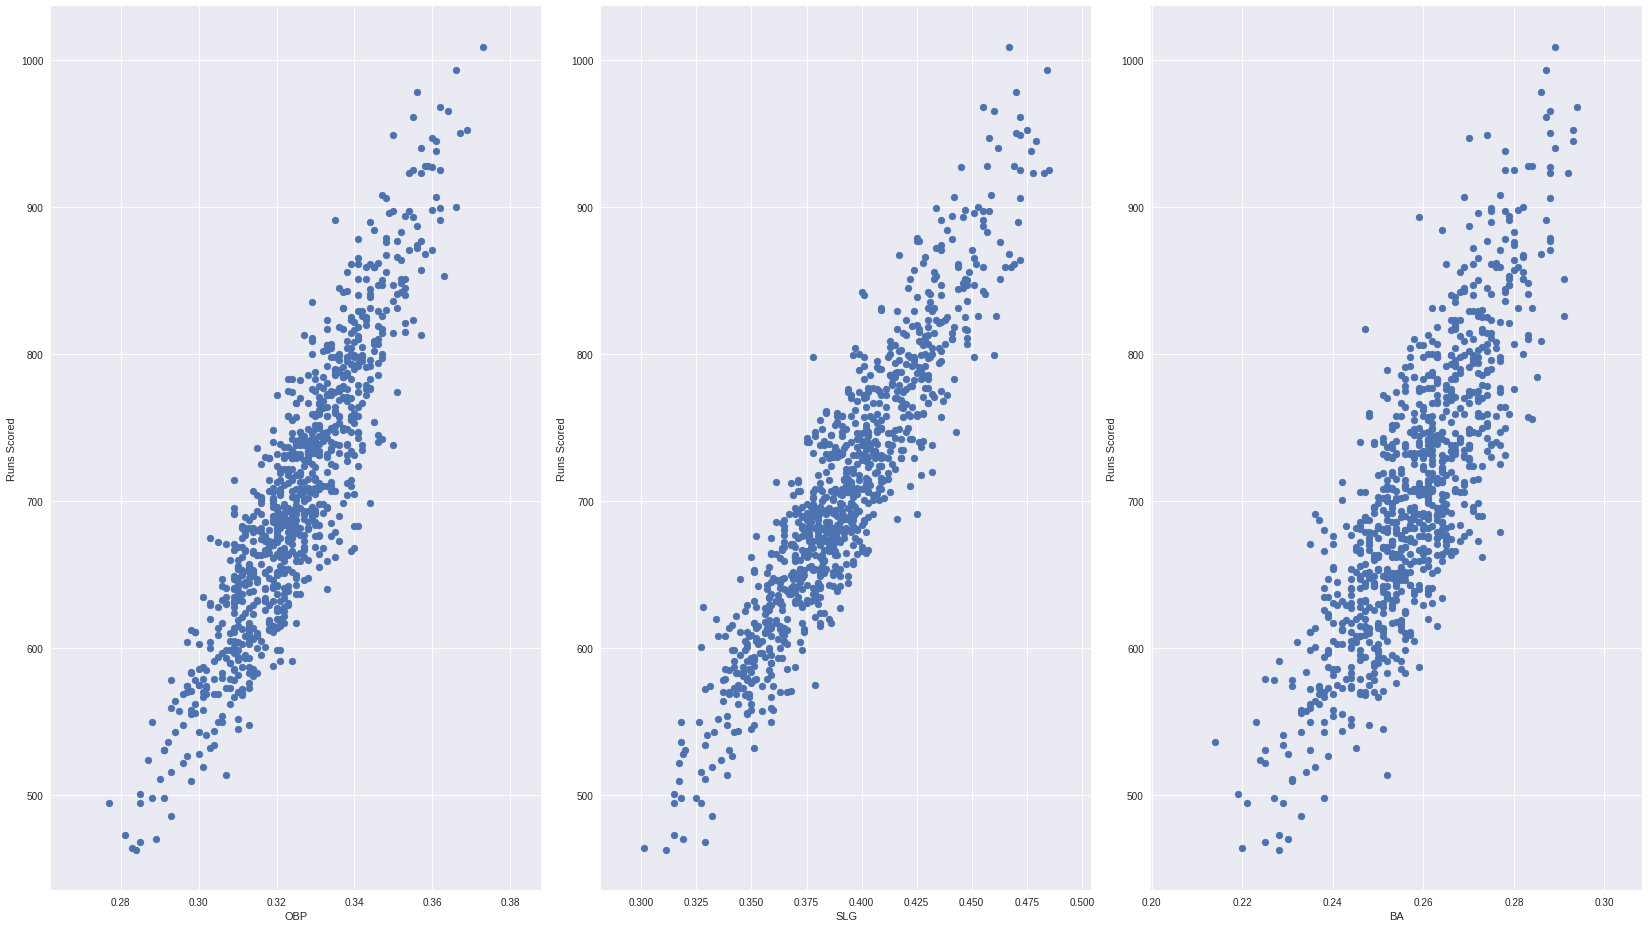

In [97]:
plot_scatter(X_RS,y_RS,"Runs Scored")

Appears to be a linear relationship between features and target variables. 

In [98]:
# train & test set for RS
from sklearn.model_selection import train_test_split
XRS_train,XRS_test,yRS_train,yRS_test = train_test_split(X_RS,y_RS,test_size=0.3)

In [99]:
# fit linear regression to RS dataset
from sklearn.linear_model import LinearRegression
regr_RS = LinearRegression()
regr_RS.fit(XRS_train,yRS_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
# check for multivariate normality & homoscedasticity
def linear_assump(X,X_col,regr_model):
    actual = mb_data[X_col]
    predicted = regr_model.predict(X)
    residual = actual - predicted
    
    plt.rcParams["figure.figsize"] = (12,6)
    fig,ax = plt.subplots(nrows=1,ncols=2)
    
    ax[0].hist(residual)
    ax[0].set_title("Multivariate Normality (Residual Counts)")
    ax[0].set_xlabel("Residual")
    ax[0].set_ylabel("Count")
    
    ax[1].scatter(predicted,residual)
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Residual")
    ax[1].axhline(y=0)
    ax[1].set_title("Homoscedasticity (Residual vs. Predicted)")
    
    fig.tight_layout()
    plt.show()

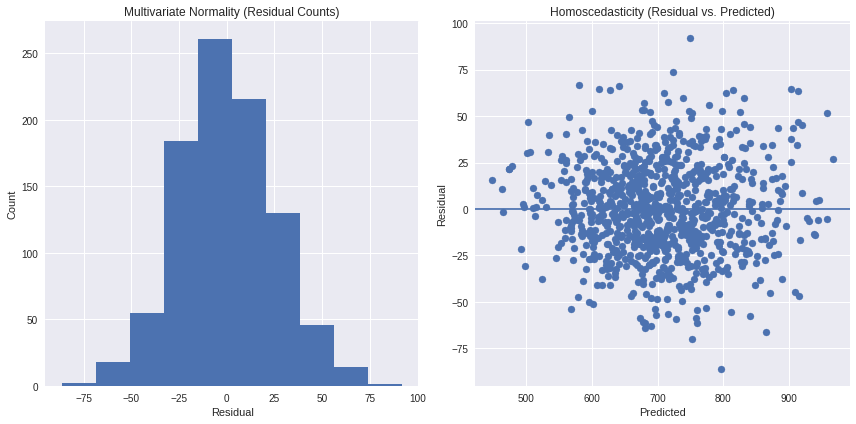

In [101]:
linear_assump(X_RS,"RS",regr_RS)

In [102]:
# evaluating model performance (RS)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(XRS_test,yRS_test))

Coefficients:
 [2905.71539574 1667.72070258 -422.71304325]

Intercept:
 -783.0955683288544

R-squared:
 0.9333728479704766
